### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자 예측해보자 !!
- 머신러닝 전체 과정에 대해서도 정리해보자 !!!

### 머신러닝 과정
- 문제정의:목표설정, 머신러닝 학습 선택
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터 분석 
- 모델 선택 및 학습
- 모델 예측 및 평가

### 1. 문제 정의
- 사망자/생존자 예측
- kaggle 에 올려 점수를 확인해보자(높은 순위 차지해보자)
- 머신러닝 과정 전체를 체험해보는 예제

### 2. 데이터 수집
- kaggle 사이트로부터 다운 train,test,submission

In [1]:
# 필요한 도구 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

#### 데이터 불러오기
- train 데이터는 train
- test 데이터는 test  
(단, 각각의 인덱스는 PassengerId 로 사용할것 ! )

In [2]:
train =  pd.read_csv('data/train.csv', index_col = 'PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
test = pd.read_csv('data/test.csv', index_col = 'PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 크기 확인 
train.shape

(891, 11)

In [5]:
test.shape # 정답레이블 존재 x /test 를 위한 데이터

(418, 10)

### 3. 데이터 전처리 및 탐색
- 결측치 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


train 데이터에 어떤 컬럼에 결측치가 있나요 ?
- Age, Cabin, Embarked

test 데이터에 어떤 컬럼에 결측치가 있나요 ?
- Age, Fare, Cabin

### Age 컬럼 결측치 처리
- 단순 기술통계치로 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보자.
- Age와 다른 컬럼의 상관관계를 확인해보자.

In [8]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Age컬럼과 상관관계가 높은 컬럼은 Pclass다
- 생존에 관련이 많을 것 같은 Sex과 함께 그룹핑에 활용해보자

In [9]:
# 1. age, pclass, sex 열인덱싱
train[['Age','Pclass','Sex']]

,Age,Pclass,Sex
PassengerId,,,
1,22.0,3,male
2,38.0,1,female
3,26.0,3,female
4,35.0,1,female
5,35.0,3,male
...,...,...,...
887,27.0,2,male
888,19.0,1,female
889,NaN,3,female


In [10]:
# 2. pclass와 sex 컬럼으로 그룹화

In [11]:
train[['Age','Pclass','Sex']].groupby(['Pclass','Sex'])

In [12]:
#3. 그룹화된 형태에서 단순기술 통계인 평균값을 뽑아보자

In [13]:
pt1 = train[['Age','Pclass','Sex']].groupby(['Pclass','Sex']).mean()
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [14]:
# train 에서 Age 컬럼 결측치 있는행 출력

In [15]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [16]:
# pclass 3, sex male
# 출력값은 26.507589
pt1.loc[(3,'male')]

Age    26.507589
Name: (3, male), dtype: float64

In [17]:
#34.611765
pt1.loc[(1,'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [18]:
# apply 함수 적용하여  age 컬럼의 결측치를 채워보자.

In [19]:
def fill_age(row):
    # 만약에 나이에 결측치가 있으면 pt1에서 값을 가져오자
    if np.isnan(row['Age']):
        return pt1.loc[(row['Pclass'],row['Sex'])]
    # 만약 결측치가 x 원래 나이값을 사용하자
    else:
        return row['Age']

In [20]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)

In [22]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [24]:
# test 마찬가지로  pt1 을 기준으로 결측치 처리
test[test['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [25]:
# test['Age'] 결측치 처리하기 
test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)

In [26]:
test[test['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [27]:
test.info() # train데이터를 기준으로 test의 age null값도 채워짐

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### train - Embarked 결측치

In [28]:
# train Embarked 결측치 있는 행 출력 
# isnull함수 이용 -> 불리언인덱싱 이용하겠다

In [29]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


In [30]:
# 승선항 embarked
#value_counts 를 통해서 train['Embarked']의 유니크하고, 카운트 되는 값을 봐보자 
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [32]:
#train['Embarked'] 컬럼에 널이 있으면 'S'로 채워주세요 ! 

In [33]:
# fillna('S')
train['Embarked'] = train['Embarked'].fillna('S')

In [34]:
# null값 잘 채워졌는지 확인 
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### test - fare 결측치 처리

In [36]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [37]:
#fare컬럼과 상관관계가 높은 컬럼은 pclass다.
# 생존/사망에 영향을 미쳤을같은 sex컬럼과도 함께 그룹화해서 fare의 평균값을 뽑아보자.

In [38]:
# fare,pclass,sex 컬럼인덱싱
# pclass,sex 그룹화
# .mean()
# pt2 저장 

In [39]:
pt2 = train[['Fare','Pclass','Sex']].groupby(['Pclass','Sex']).mean()
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [40]:
# test 데이터의 fare 요금의 결측치 있는 행 출력 
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [41]:
#test.loc[1044,'Fare'] = 

In [42]:
# fillna() - null값 찾아줌과 동시에 null채워줌
test['Fare'] = test['Fare'].fillna(12.661633)


In [43]:
# isnull() 결측치 확인 
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Cabin 결측치 처리

In [44]:
# cabin 컬럼 값을 중복값이 뽑아주세요 ! 
train['Cabin'].unique()
# 'M' 으로 널부분을 채워버리자 ! 
train['Cabin'] = train['Cabin'].fillna('M')
# test 적용
test['Cabin'] =test['Cabin'].fillna('M')

In [45]:
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
train['Deck'] = train['Cabin'].str[0]

In [47]:
test['Deck'] = test['Cabin'].str[0]

In [48]:
train['Deck'].head()

PassengerId
1    M
2    C
3    M
4    C
5    M
Name: Deck, dtype: object

In [49]:
test['Deck'].head()

PassengerId
892    M
893    M
894    M
895    M
896    M
Name: Deck, dtype: object

In [50]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,M,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,M,S,M


In [51]:
# cabin 컬럼 drop해주세요 ! 
#train = train.drop('Cabin',axis = 1)
train.drop('Cabin',axis = 1, inplace = True)

In [52]:
# test cabin삭제
test.drop('Cabin',axis = 1, inplace = True)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### 데이터 탐색

- train 데이터를 이요하여 탐색해보자
- test 데이터를 탐색하는 것은 모델의 일반화하는데 도움을 주지 못함

In [54]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

#### Deck 시각화

In [55]:
train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [56]:
# M 에서는 상대적으로 죽은 사람의 비율이 높음

#### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

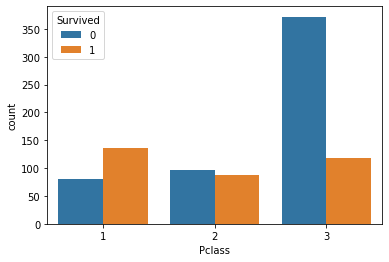

In [57]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

In [58]:
# pclass == 1 , 생존자의 비율이 높음
# pclass == 2, 거의 비슷하지만, 사망자의 비율이 조금 높음
# pclass == 3, 사망자의 비율이 월등히 높음 
# pclass 값이 낮을수록(계층이 낮을수록) 많이 죽음

#### Deck 과 Pclass 시각화

<AxesSubplot:xlabel='Deck', ylabel='count'>

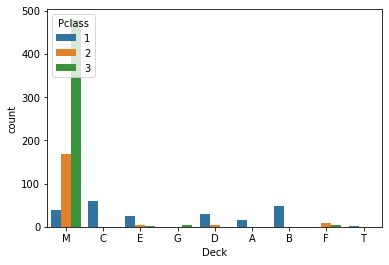

In [59]:
sns.countplot(data = train, x = 'Deck', hue ='Pclass')

In [60]:
# M 에서 사람이 상대적으로 많이 죽은 이유는 단순하게 3등급의 사람이 많이 속해있기 때문

#### Sex, Embarked 시각화 해보자

In [61]:
# x = Sex, hue = Embarked 
# sns.countplot

<AxesSubplot:xlabel='Sex', ylabel='count'>

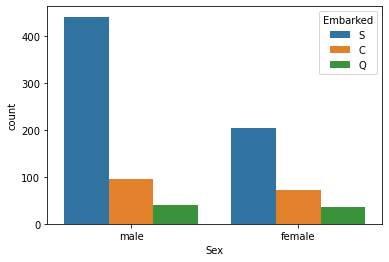

In [62]:
sns.countplot(data = train, x = 'Sex', hue = 'Embarked')

In [63]:
# x = Embarked , hue = Survived

<AxesSubplot:xlabel='Embarked', ylabel='count'>

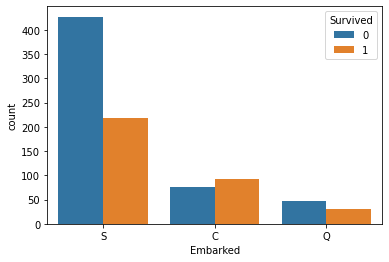

In [64]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

### 수치형 데이터
- sns.violinplot : 박스플롯+밀집도 그래프

#### Age

(0.0, 80.0)

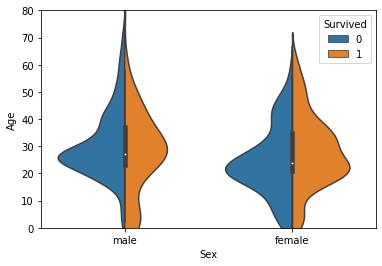

In [65]:
sns.violinplot(data = train,
              x ='Sex',
              y ='Age',
              hue = 'Survived',
              split = True)
plt.ylim(0,80)

- 20~40대 사이가 사망/생존의 비율 높음
- 어린아이 중에서 남자아이가 여자아이 비해 많이 생존

### Fare 시각화

In [66]:
# 단순 기술 통계 뽑아보자
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

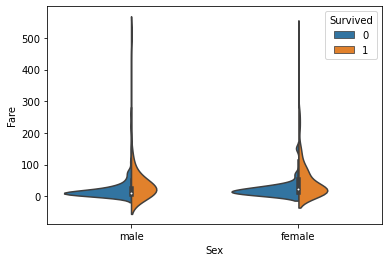

In [67]:
# x축 성별, y축 Fare, hue- Survived
sns.violinplot(data = train,
              x ='Sex',
              y ='Fare',
              hue = 'Survived',
              split = True)
# plt.ylim(0,300)

In [68]:
# 요금이 싼 사람이 비교적 많이 사망

### 특성 공학
Parch, Sibsp - 부모자식, 형제배우자 : 더해서 가족의 숫자라는 새로운 컬럼 생성

In [69]:
# + 1 
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1

In [70]:
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1

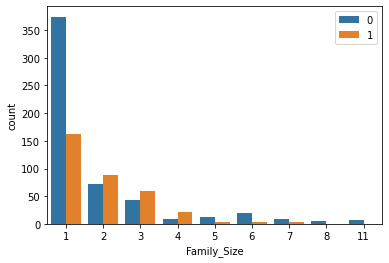

In [71]:
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')
plt.legend(loc = 'upper right')

In [72]:
# 1명일때는 사망 비율 높음, 2~4명일때는 생존 비율 높음, 5~11명은 사망비율이 높음
# 수치형 데이터 -> 범주형 데이터 : binning

### cut 함수 이용 : 카테고리화

In [73]:
# bins 구간 설정
# labels 카테고리 이름 설정

In [74]:
b = [0, 1, 4, 20]
lb = ['Alone','Small','Large']
pd.cut(train['Family_Size'], bins=b, labels=lb)

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Size, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [75]:
b = [0, 1, 4, 20]
lb = ['Alone','Small','Large']
train['Family_Group'] = pd.cut(train['Family_Size'], bins=b, labels=lb)

In [76]:
test['Family_Group'] = pd.cut(test['Family_Size'], bins=b, labels=lb)

In [77]:
test['Family_Group'].head()

PassengerId
892    Alone
893    Small
894    Alone
895    Alone
896    Small
Name: Family_Group, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

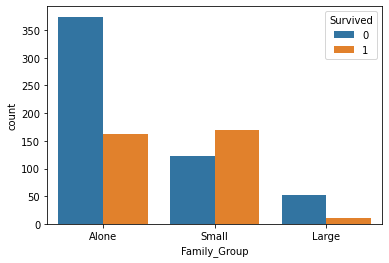

In [78]:
# x-family_group, hue-survived/x,y둘중에 하나만 있으면 countplot사용
sns.countplot(data = train,
              x ='Family_Group',
              hue = 'Survived')

- 필요없는 컬럼 삭제

In [79]:
# Parch, sibsp, family_size 삭제
train.drop(['Parch','SibSp','Family_Size'], axis=1, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   Ticket        891 non-null    object  
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 110.6+ KB


In [80]:
# 컬럼 찾기
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Embarked', 'Deck', 'Family_Group'],
      dtype='object')

In [81]:
test.drop(['Parch','SibSp','Family_Size'], axis=1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   Ticket        418 non-null    object  
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_Group  418 non-null    category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 29.9+ KB


In [82]:
# 전처리를 안했던 컬럼 삭제 Name, Ticket
test.drop(['Name','Ticket'], axis=1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   Fare          418 non-null    float64 
 4   Embarked      418 non-null    object  
 5   Deck          418 non-null    object  
 6   Family_Group  418 non-null    category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 23.4+ KB


In [83]:
train.drop(['Name','Ticket'], axis=1, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 96.7+ KB


### 문제와 답 분리

In [84]:
#훈련데이터 문제
# X_train = train[['Pclass', 'Sex', 'Age', 'Fare']] #2차원
X_train = train.drop('Survived', axis=1)
# train.loc[:,'Pclass',:]
# train.iloc[:,1:]
# train['Pclass':'Family_Group']
# train[['Pclass','Sex','Age','Fare']]

#훈련데이터 답 -1차원
y_train = train[['Survived']] 

#테스트 데이터 문제
X_test = test

# y_test는 답을 알고있지 않기때문에 담아주지 않는다.

In [85]:
# 각각의 크기 확인
#X_train = train.drop(['Survived'], axis=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 7)
(891, 1)
(418, 7)


- 원핫 인코딩

In [86]:
cat_feature = ['Sex', 'Embarked','Deck','Family_Group']

In [87]:
# 예시 값이 들어있으면 1, 없으면 0 (dummies)
pd.get_dummies(X_train['Sex'], prefix = 'Sex')

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [88]:
# cat_feature 원핫
for cat_name in cat_feature:
    one_hot = pd.get_dummies(X_train[cat_name], prefix = cat_name)
    X_train = pd.concat([X_train,one_hot], axis=1) #원핫 인코딩 컬럼 병합
    X_train.drop(cat_name, axis= 1, inplace = True) # 기존 컬럼 drop

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    uint8  
 4   Sex_male            891 non-null    uint8  
 5   Embarked_C          891 non-null    uint8  
 6   Embarked_Q          891 non-null    uint8  
 7   Embarked_S          891 non-null    uint8  
 8   Deck_A              891 non-null    uint8  
 9   Deck_B              891 non-null    uint8  
 10  Deck_C              891 non-null    uint8  
 11  Deck_D              891 non-null    uint8  
 12  Deck_E              891 non-null    uint8  
 13  Deck_F              891 non-null    uint8  
 14  Deck_G              891 non-null    uint8  
 15  Deck_M              891 non-null    uint8  
 16  Deck_T  

In [90]:
#X_test 원핫 인코딩
for cat_name in cat_feature:
    one_hot = pd.get_dummies(X_test[cat_name], prefix = cat_name)
    X_test = pd.concat([X_test,one_hot], axis=1) #원핫 인코딩 컬럼 병합
    X_test.drop(cat_name, axis= 1, inplace = True) # 기존 컬럼 drop

In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Famil

In [92]:
# set 집합 - 정렬 중복제거
ls = [1,1,3,2,2,0]
set(ls)

{0, 1, 2, 3}

In [93]:
# X_train에만 있는 컬럼이 무엇인지 알수있다
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [94]:
X_test['Deck_T'] = 0

In [95]:
X_train.shape

(891, 20)

In [96]:
X_test.shape

(418, 20)

- 컬럼이름 정렬

In [97]:
# 컬럼 정렬
# sort_index(axis = 1)

In [98]:
X_train.sort_index(axis = 1, inplace = True)
X_test.sort_index(axis = 1, inplace = True)

### 모델 선전 및 학습

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
tree_model = DecisionTreeClassifier()

In [101]:
# 학습 
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
# 예측 , 예측값 실제답과 맞지않을수 있음
pre =tree_model.predict(X_test)
pre

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [103]:
# gender_submission.csv 불러오기
data = pd.read_csv('data/gender_submission.csv')
data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [104]:
# Survived에 대입해주기 , 예측값이 Survived파일에 담아주게됨
data['Survived']=pre

In [105]:
# data.to_csv('pyj_submission1.csv', index = False) 파일 이름 설정
data.to_csv('pyj_submission1.csv', index = False)

### 과대적합제어
    - 하이퍼 파라미터 튜닝

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# random_state = 77, test_size =30%
X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train,random_state = 77)

In [108]:
# 4가지의 shape
print(X_train2.shape)
print(y_train2.shape)

print(X_val.shape)
print(y_val.shape)

(668, 20)
(668, 1)
(223, 20)
(223, 1)


In [109]:
# 요소값들을 쌓아주는 자료형
train_score_list = []
test_score_list = []

for max_d in range(1,50):
    model = DecisionTreeClassifier(max_depth = max_d)
    # 학습
    model.fit(X_train2,y_train2) 
    
    # 트레인 정확도 누적
    # 정확도 구하기 list 에 append
    train_score_list.append(model.score(X_train2,y_train2))
    # 테스트 정확도 누적
    test_score_list.append(model.score(X_val,y_val))

In [110]:
train_score_list[:5]

[0.7799401197604791,
 0.7799401197604791,
 0.8233532934131736,
 0.8473053892215568,
 0.8607784431137725]

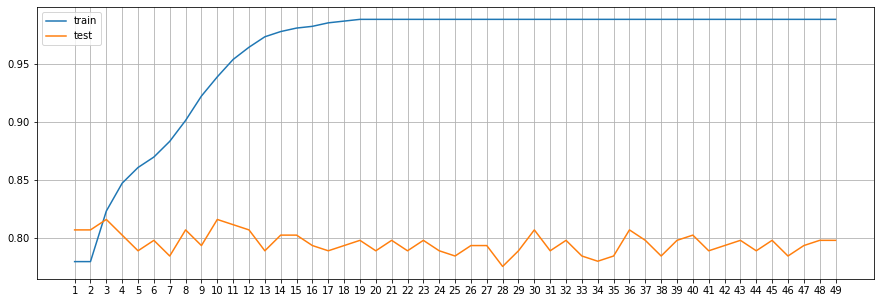

In [111]:
# 그래프
plt.figure(figsize = (15,5))
plt.plot(range(1,50),train_score_list,label = 'train')
plt.plot(range(1,50),test_score_list,label = 'test')
plt.legend()
plt.xticks(range(1,50))
plt.grid()
plt.show()

In [112]:
# 과대적합 제어 - tree깊이 지정

In [113]:
# 트리 깊이 = 3 모델 생성
tree_model = DecisionTreeClassifier(max_depth = 3)
# 학습 
tree_model.fit(X_train,y_train)
# 예측
pre = tree_model.predict(X_test)
# 정답지 초기화
result = pd.read_csv('data/gender_submission.csv')
result['Survived'] = pre
result.to_csv('pyj_submission1.csv', index = False)
# kaggle에 올려 정확도 확인해보자!

### 검증 데이터 이용- 모델 일반화 확인
- 교차검증 : cross_validation(일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한번에 나누는 것보다는 안정적 신뢰성 있음

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
tree_model = DecisionTreeClassifier(max_depth = 3)

In [116]:
# 교차검증
tree_cross_result = cross_val_score(tree_model, X_train, y_train, cv=5)
print(tree_cross_result)
print(tree_cross_result.mean())

[0.81005587 0.80898876 0.80337079 0.78089888 0.80337079]
0.8013370158809867


In [117]:
tree_model = DecisionTreeClassifier(max_depth = 5)
tree_cross_result = cross_val_score(tree_model, X_train, y_train, cv=5)
print(tree_cross_result)
print(tree_cross_result.mean())
# 교차검증의 정확도의 차이 폭이 넓어 신뢰하기가 어렵다

[0.81564246 0.78651685 0.8258427  0.78651685 0.86516854]
0.8159374803841567


In [118]:
tree_model = DecisionTreeClassifier(max_depth = 8)
tree_cross_result = cross_val_score(tree_model, X_train, y_train, cv=5)
print(tree_cross_result)
print(tree_cross_result.mean())

[0.80446927 0.79213483 0.85955056 0.78651685 0.84269663]
0.8170736300295023


In [119]:
# max_depth =3일때 정확도 평균이 제일 낮긴 하지만,
# 각각의 교차 검증후의 정확도들의 차이의 폭이 제일 적기 때문에 
# max_depth = 3이라고 설정모델-> 신뢰성 있다

# max_depth =3을 가진 모델은 모든 샘플 데이터에 대해 안정성을 가지고있다.

In [120]:
# 분류모델
from sklearn.ensemble import RandomForestClassifier

In [121]:
forest_model = RandomForestClassifier(random_state = 0)

In [122]:
forest_model.fit(X_train,y_train)

<ipython-input-122-2084ede82c1c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [123]:
forest_pre = forest_model.predict(X_test)

In [124]:
result = pd.read_csv('data/gender_submission.csv')
result['Survived'] = forest_pre

#csv 파일로 저장
result.to_csv('pjy_submission02.csv', index = False)

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# 파라미터 정의
param_grid = {
    'max_depth' :[5,10,15],
    'n_estimators':[1000,1500],
    'max_features': [0.5,0.6,0.7],
    'max_leaf_nodes': [20,30,50]
}

In [127]:
grid = GridSearchCV(forest_model, param_grid, cv=3)

In [128]:
# grid 어떤 파라미터가 좋은가? 최적인가? 학습하게 만듬
grid.fit(X_train,y_train)

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [0.5, 0.6, 0.7],
                         'max_leaf_nodes': [20, 30, 50],
                         'n_estimators': [1000, 1500]})

In [129]:
print(grid.best_score_)
grid.best_params_ 

0.830527497194164


{'max_depth': 10,
 'max_features': 0.7,
 'max_leaf_nodes': 30,
 'n_estimators': 1500}

- 베스트 파라미터 사용하여 모델 생성

In [131]:
forest_model = RandomForestClassifier(max_depth = 10,max_features = 0.7,
                                      max_leaf_nodes = 30,n_estimators = 1500,
                                      random_state = 0)

In [133]:
#학습
forest_model.fit(X_train,y_train)

<ipython-input-133-22abff26d9a8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, max_features=0.7, max_leaf_nodes=30,
                       n_estimators=1500, random_state=0)

In [135]:
# 교차검증 정확도 확인
cross_val_score(forest_model, X_train,y_train, cv =5),mean()

C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\21SMT35\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

NameError: name 'mean' is not defined

In [139]:
# 예측
final_result = forest_model.predict(X_test)

In [ ]:
# csv저장후 kaggle 업로드하여 정확도 확인

In [140]:
result['Survived'] = final_result

In [143]:
result['Survived']
result.to_csv('pyj_submission04.csv', index = False)
#1. 성능개선을 위해 매개변수 고쳐주기
#2. 데이터를 좀더 살펴보자